<a href="https://colab.research.google.com/github/mikemykhaylov/MAT-494/blob/main/1_3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install numpy seaborn scipy matplotlib ipympl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.2 MB/s eta 0:00:00


In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

from itertools import combinations

In [4]:
%matplotlib widget

# 1.3 Linear Regression

Topics of this chapter
- QR decomposition
- Least squares
- Linear regression

## QR decomposition

The QR decomposition of a matrix is a decomposition of the matrix into an orthogonal matrix and a triangular matrix. A QR decomposition of a real square matrix A is a decomposition of A as A = QR, where Q is an orthogonal matrix (i.e. QTQ = I) and R is an upper triangular matrix (also called right triangular matrix). If A is invertible, then the factorization is unique if we require the diagonal elements of R to be positive.

In [5]:
# create a random matrix
A = np.random.rand(2, 3)

# use the QR decomposition
q, r = np.linalg.qr(A)

# check that q is indeed orthogonal
print(np.linalg.norm(q @ q.T - np.eye(2)))

# check that r is upper triangular
print(np.linalg.norm(np.triu(r) - r))

# check that q @ r = mat
print(np.linalg.norm(q @ r - A))

4.873772529514145e-16
0.0
4.2001807449902774e-16


## Least squares
Often we try to solve a system of linear equations that has no solution. For example, we may have more equations than unknowns, i.e it is overdetermined. In this case, we can only try to find a solution that comes close to solving the system. This is called a least squares solution. Basically, we try to minimize: $||Ax - b||^2$.

### Solving using normal equations
The normal equations are obtained by setting the gradient of the objective function to zero, since it is a minimum. In this case, the objective function is $||Ax - b||^2$. The gradient of this function is $2A^T(Ax - b)$. Setting this to zero and solving for x gives us the normal equations: $A^TAx = A^Tb$. If $A^TA$ is invertible, then the solution is $x = (A^TA)^{-1}A^Tb$.

### Solving using QR decomposition
We can also solve the least squares problem using QR decomposition. We can write $Ax = b$ as $QRx = b$. Multiplying both sides by $Q^T$ gives us $Rx = Q^Tb$. Since R is upper triangular, we can solve this system of equations by back substitution. This is more numerically stable than solving the normal equations.

In [6]:
# random matrix
A = np.random.rand(3, 2)
# random vector
b = np.random.rand(3)

# verify that no solution exists when using the inverse
try:
    x = np.linalg.inv(A) @ b
except np.linalg.LinAlgError:
    print('no solution exists with inverse')

# use the normal equation to find the least squares solution
x = np.linalg.inv(A.T @ A) @ A.T @ b

print(x)

# verify that the solution is correct
print(np.linalg.norm(A @ x - b))

# use the QR decomposition to find the least squares solution
q, r = np.linalg.qr(A)
x = np.linalg.inv(r) @ q.T @ b

print(x)

# verify that the solution is correct
print(np.linalg.norm(A @ x - b))

no solution exists with inverse
[ 0.63360999 -0.20918018]
0.48456898520821506
[ 0.63360999 -0.20918018]
0.48456898520821506


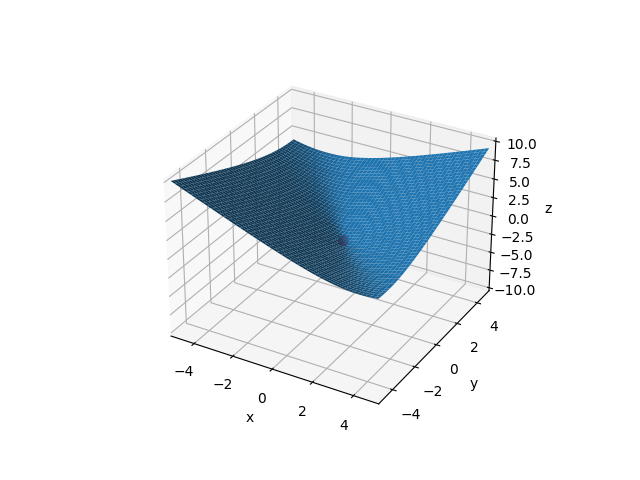

In [7]:
# create a meshgrid
X, Y = np.meshgrid(np.linspace(-5, 5, 1000), np.linspace(-5, 5, 1000))

Z = np.linalg.norm(A @ np.vstack((X.flatten(), Y.flatten())) - b[:, None], axis=0).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x[0], ys=x[1], zs=np.linalg.norm(A @ x - b), c='r', s=50)
ax.plot_surface(X, Y, Z)

# plot the point

# set the axes limits
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-10, 10])

# name the axes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## Linear regression
Linear regression can be viewed as optimizing least squares for all the data points. We can write this as $||Xw - y||^2$, where X is the matrix of data points, w is the vector of weights, and y is the vector of labels. By trying to minimize $\min_w ||Xw - y||^2$, we turn this into a least squares problem discussed above. We can solve this using the normal equations or QR decomposition.